In [1]:
#使用逻辑回归对信用卡欺诈进行分类
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve,accuracy_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#混淆矩阵可视化
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix"', cmap = plt.cm.Blues) :
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)
 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [23]:
#显示模型评估结果
def show_metrics(y_test,y_predict):
    a=accuracy_score(y_test,y_predict)
    b=precision_score(y_test,y_predict)
    c=recall_score(y_test,y_predict)
    d=(2*b*c)/(b+c)
    print('准确率：{:.3f}'.format(a))
    print('精确率：{:.3f}'.format(b))
    print('召回率：{:.3f}'.format(c))
    print('F1值：{:.3f}'.format(d))

In [24]:
#绘制精确率-召回率曲线
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b')
    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('召回率')
    plt.ylabel('精确率')
    plt.title('精确率-召回率 曲线')
    plt.show()

In [29]:
#数据加载
data=pd.read_csv('./creditcard.csv')

In [30]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
#data中没有空值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [32]:
#数据探索
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

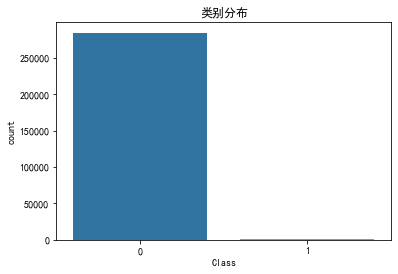

In [33]:
#绘制交易类别分布
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure()
sns.countplot(x='Class',data=data)
plt.title('类别分布')
plt.show()

In [34]:
#显示总交易笔数、诈骗交易笔数
num=len(data)
num_fraud=len(data[data['Class']==1])
print('总交易笔数：',num)
print('诈骗交易笔数：',num_fraud)
print('诈骗交易比例：{:.6f}'.format(num_fraud/num))

总交易笔数： 284807
诈骗交易笔数： 492
诈骗交易比例：0.001727


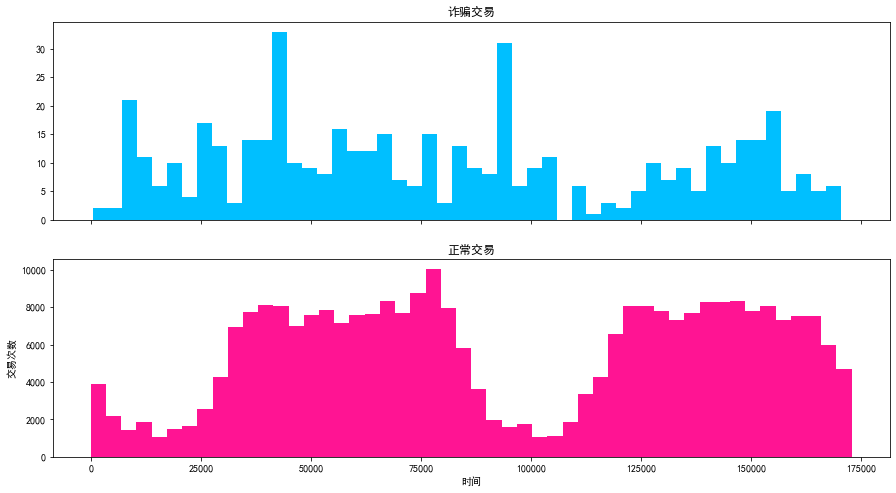

In [51]:
#正常交易与诈骗交易可视化
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(15,8))
bins=50
ax1.hist(data.Time[data.Class==1],bins=bins,color='deepskyblue')
ax1.set_title('诈骗交易')
ax2.hist(data.Time[data.Class==0],bins=bins,color='deeppink')
ax2.set_title('正常交易')
plt.xlabel('时间')
plt.ylabel('交易次数')
plt.show()

In [43]:
#对Amount进行数据规范化处理
data['Amount_Norm']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))

In [9]:
#特征选择
y=data['Class']
x=data.drop(labels=['Time','Amount','Class'],axis=1)

In [61]:
#数据集划分为训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=33)

In [62]:
#逻辑回归分类
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_predict=clf.predict(x_test)

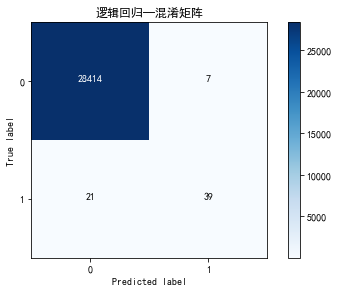

In [63]:
#计算、显示混淆矩阵
cm=confusion_matrix(y_test,y_predict)
class_names=[0,1]
plot_confusion_matrix(cm,classes=class_names,title='逻辑回归—混淆矩阵')

In [64]:
#显示模型评估分数
show_metrics(y_test,y_predict)

准确率：0.999
精确率：0.848
召回率：0.650
F1值：0.736


In [69]:
#预测样本的置信分数
y_score=clf.decision_function(x_test)

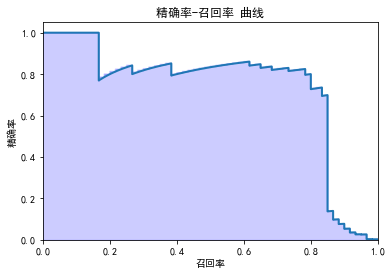

In [71]:
#计算精确率，召回率，阈值用于可视化
precision,recall,thresholds=precision_recall_curve(y_test,y_score)
plot_precision_recall()